In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heler_functions as hf
import autogluon
import importlib
from autogluon.tabular import TabularPredictor, TabularDataset

importlib.reload(hf)

<module 'heler_functions' from '/Users/delfosg/Documents/kaggle_hoddie/heler_functions.py'>

In [3]:
df = pd.read_csv('/Users/delfosg/Documents/kaggle_hoddie/data/train.csv')
df = df.drop(columns=('id'))

Original DF Shape: (2190, 12)
Fixed DF Shape: (2190, 14)


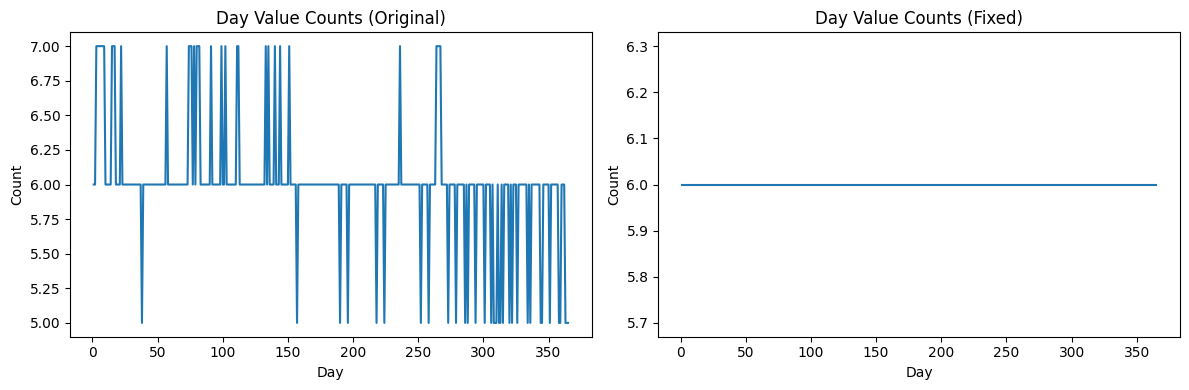

In [4]:
# fix days annomalies
fixed_df = hf.fix_day_sequence_with_month_year(df)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df.day.value_counts().sort_index().plot(kind='line', title='Day Value Counts (Original)', xlabel='Day', ylabel='Count', ax=axes[0])
axes[0].set_title('Day Value Counts (Original)')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')

fixed_df.day.value_counts().sort_index().plot(kind='line', title='Day Value Counts (Fixed)', xlabel='Day', ylabel='Count', ax=axes[1])
axes[1].set_title('Day Value Counts (Fixed)')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

plt.tight_layout()  # Adjust layout to make sure the labels and titles fit
print('Original DF Shape:', df.shape)
print('Fixed DF Shape:', fixed_df.shape)
plt.show()

In [5]:
# feature engineering
featured_df = hf.feature_engineering(fixed_df)
print('Original Column:', fixed_df.columns, '| Count:', len(fixed_df.columns))
new_columns = featured_df.columns.difference(fixed_df.columns)
print('New columns:', new_columns, '| Count:', len(new_columns))
numerical_columns = featured_df.select_dtypes('number').columns
categorical_columns = featured_df.select_dtypes('object').columns
print('Numerical columns:', len(numerical_columns))
print('Categorical columns:', len(categorical_columns))

Original Column: Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall', 'month', 'year'],
      dtype='object') | Count: 14
New columns: Index(['cloud_rolling_14d', 'cloud_rolling_3d', 'cloud_rolling_7d',
       'cloud_sunshine_interaction', 'cloud_sunshine_ratio', 'day_of_year_cos',
       'day_of_year_sin', 'dewpoint_depression',
       'dewpoint_humidity_interaction', 'extreme_humidity', 'extreme_pressure',
       'extreme_temp', 'humidity_dewpoint_ratio', 'humidity_rolling_14d',
       'humidity_rolling_3d', 'humidity_rolling_7d', 'humidity_std_14d',
       'humidity_std_7d', 'humidity_trend_3d', 'pressure_acceleration',
       'pressure_change', 'pressure_rolling_14d', 'pressure_rolling_3d',
       'pressure_rolling_7d', 'pressure_std_14d', 'pressure_std_7d',
       'pressure_trend_3d', 'pressure_wind_interaction', 'season',
       'temp_humidity_index', 'temp_humidity_inte

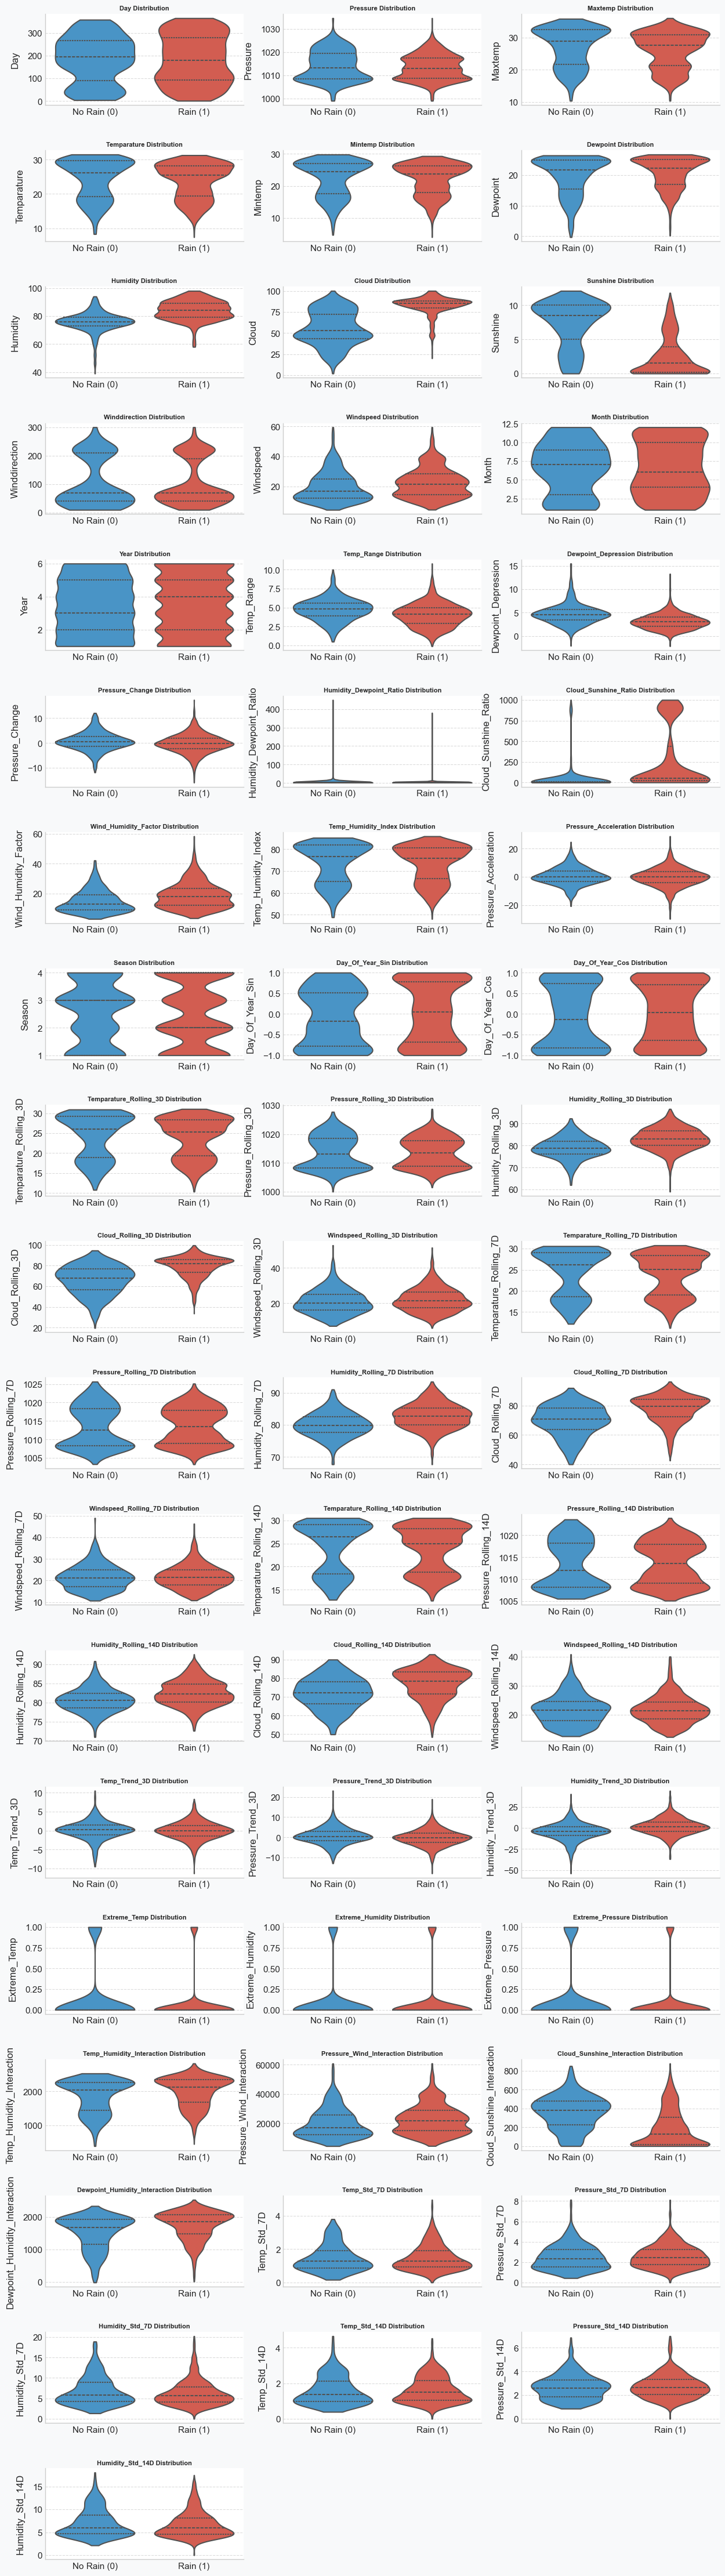

In [6]:
hf.show_violin_plot(featured_df, numerical_columns, 'rainfall')

In [14]:
if input('train y/n: ').lower() == 'y':
    print('Training Autogluon...')
    
    predictor = TabularPredictor(problem_type = 'binary',
                                                   label = 'rainfall',
                                                   eval_metric = 'roc_auc',
                                                   path = '/Users/delfosg/Documents/kaggle_hoddie/models/full_predictor',
    )
    
    predictor = predictor.fit(train_data = featured_df,
                              presets = 'high',
                              holdout_frac = 0.2,
                              time_limit = 60*60*1,
    )
    print('Training complete.')
    

Preset alias specified: 'high' maps to 'high_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:06 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       1.69 GB / 8.00 GB (21.1%)
Disk Space Avail:   77.91 GB / 228.27 GB (34.1%)
Presets specified: ['high']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyS

Training Autogluon...


2025-03-30 21:56:45,371	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-03-30 21:56:53,113	INFO worker.py:1810 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
		Context path: "/Users/delfosg/Documents/kaggle_hoddie/models/full_predictor/ds_sub_fit/sub_fit_ho"
(_dystack pid=5062) Running DyStack sub-fit ...
(_dystack pid=5062) Beginning AutoGluon training ... Time limit = 889s
(_dystack pid=5062) AutoGluon will save models to "/Users/delfosg/Documents/kaggle_hoddie/models/full_predictor/ds_sub_fit/sub_fit_ho"
(_dystack pid=5062) Train Data Rows:    1946
(_dystack pid=5062) Train Data Columns: 55
(_dystack pid=5062) Label Column:       rainfall
(_dystack pid=5062)

(_ray_fit pid=5741) [1000]	valid_set's binary_logloss: 0.338936


(_dystack pid=5062) 	0.8891	 = Validation score   (roc_auc)
(_dystack pid=5062) 	5.59s	 = Training   runtime
(_dystack pid=5062) 	0.38s	 = Validation runtime
(_dystack pid=5062) Fitting model: RandomForest_r39_BAG_L1 ... Training model for up to 200.20s of the 496.77s of remaining time.
(_ray_fit pid=5716) No improvement since epoch 9: early stopping [repeated 7x across cluster]
(_dystack pid=5062) 	0.8759	 = Validation score   (roc_auc)
(_dystack pid=5062) 	2.52s	 = Training   runtime
(_dystack pid=5062) 	0.08s	 = Validation runtime
(_dystack pid=5062) Fitting model: CatBoost_r167_BAG_L1 ... Training model for up to 197.58s of the 494.15s of remaining time.
(_dystack pid=5062) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=1.69%)
(_dystack pid=5062) 	0.8882	 = Validation score   (roc_auc)
(_dystack pid=5062) 	10.82s	 = Training   runtime
(_dystack pid=5062) 	0.02s	 = Validation runtime
(_dystack pid=5062) F

Training complete.


In [ ]:
wh